<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

1. Se carga la Base de Datos

In [ ]:
XDB=pd.read_excel('/content/0. BGD and Cost of Debt 2.xlsx',sheet_name=0)
XDB=XDB[['WACC_ST','WACC_LT','ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']]
XDB=XDB.dropna()

#Se cargan los datos en bruto
XD=np.array(XDB[['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']])
yd=np.array(XDB[['WACC_ST','WACC_LT']])
yds=np.array(XDB[['WACC_ST']])
ydl=np.array(XDB[['WACC_LT']])

#Se normalizan los datos
XDn=XD/np.max(XD,axis=0)

#Se hace el Centramiento
ydnsc=(yds-np.mean(yds))/np.std(yds)
ydnlc=(ydl-np.mean(ydl))/np.std(ydl)
#Variable de salida como Probabilidad Empírica
ydps=1/1/(1+np.exp(-ydnsc))
ydpl=1/1/(1+np.exp(-ydnlc))

In [ ]:
#Se crea el DashBoard para WACC Short Term
sns.pairplot(XDB,hue='WACC_ST',size=6,vars=['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S'])

In [ ]:
#Se crea el DashBoard para WACC Long Term
sns.pairplot(XDB,hue='WACC_LT',size=6,vars=['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S'])

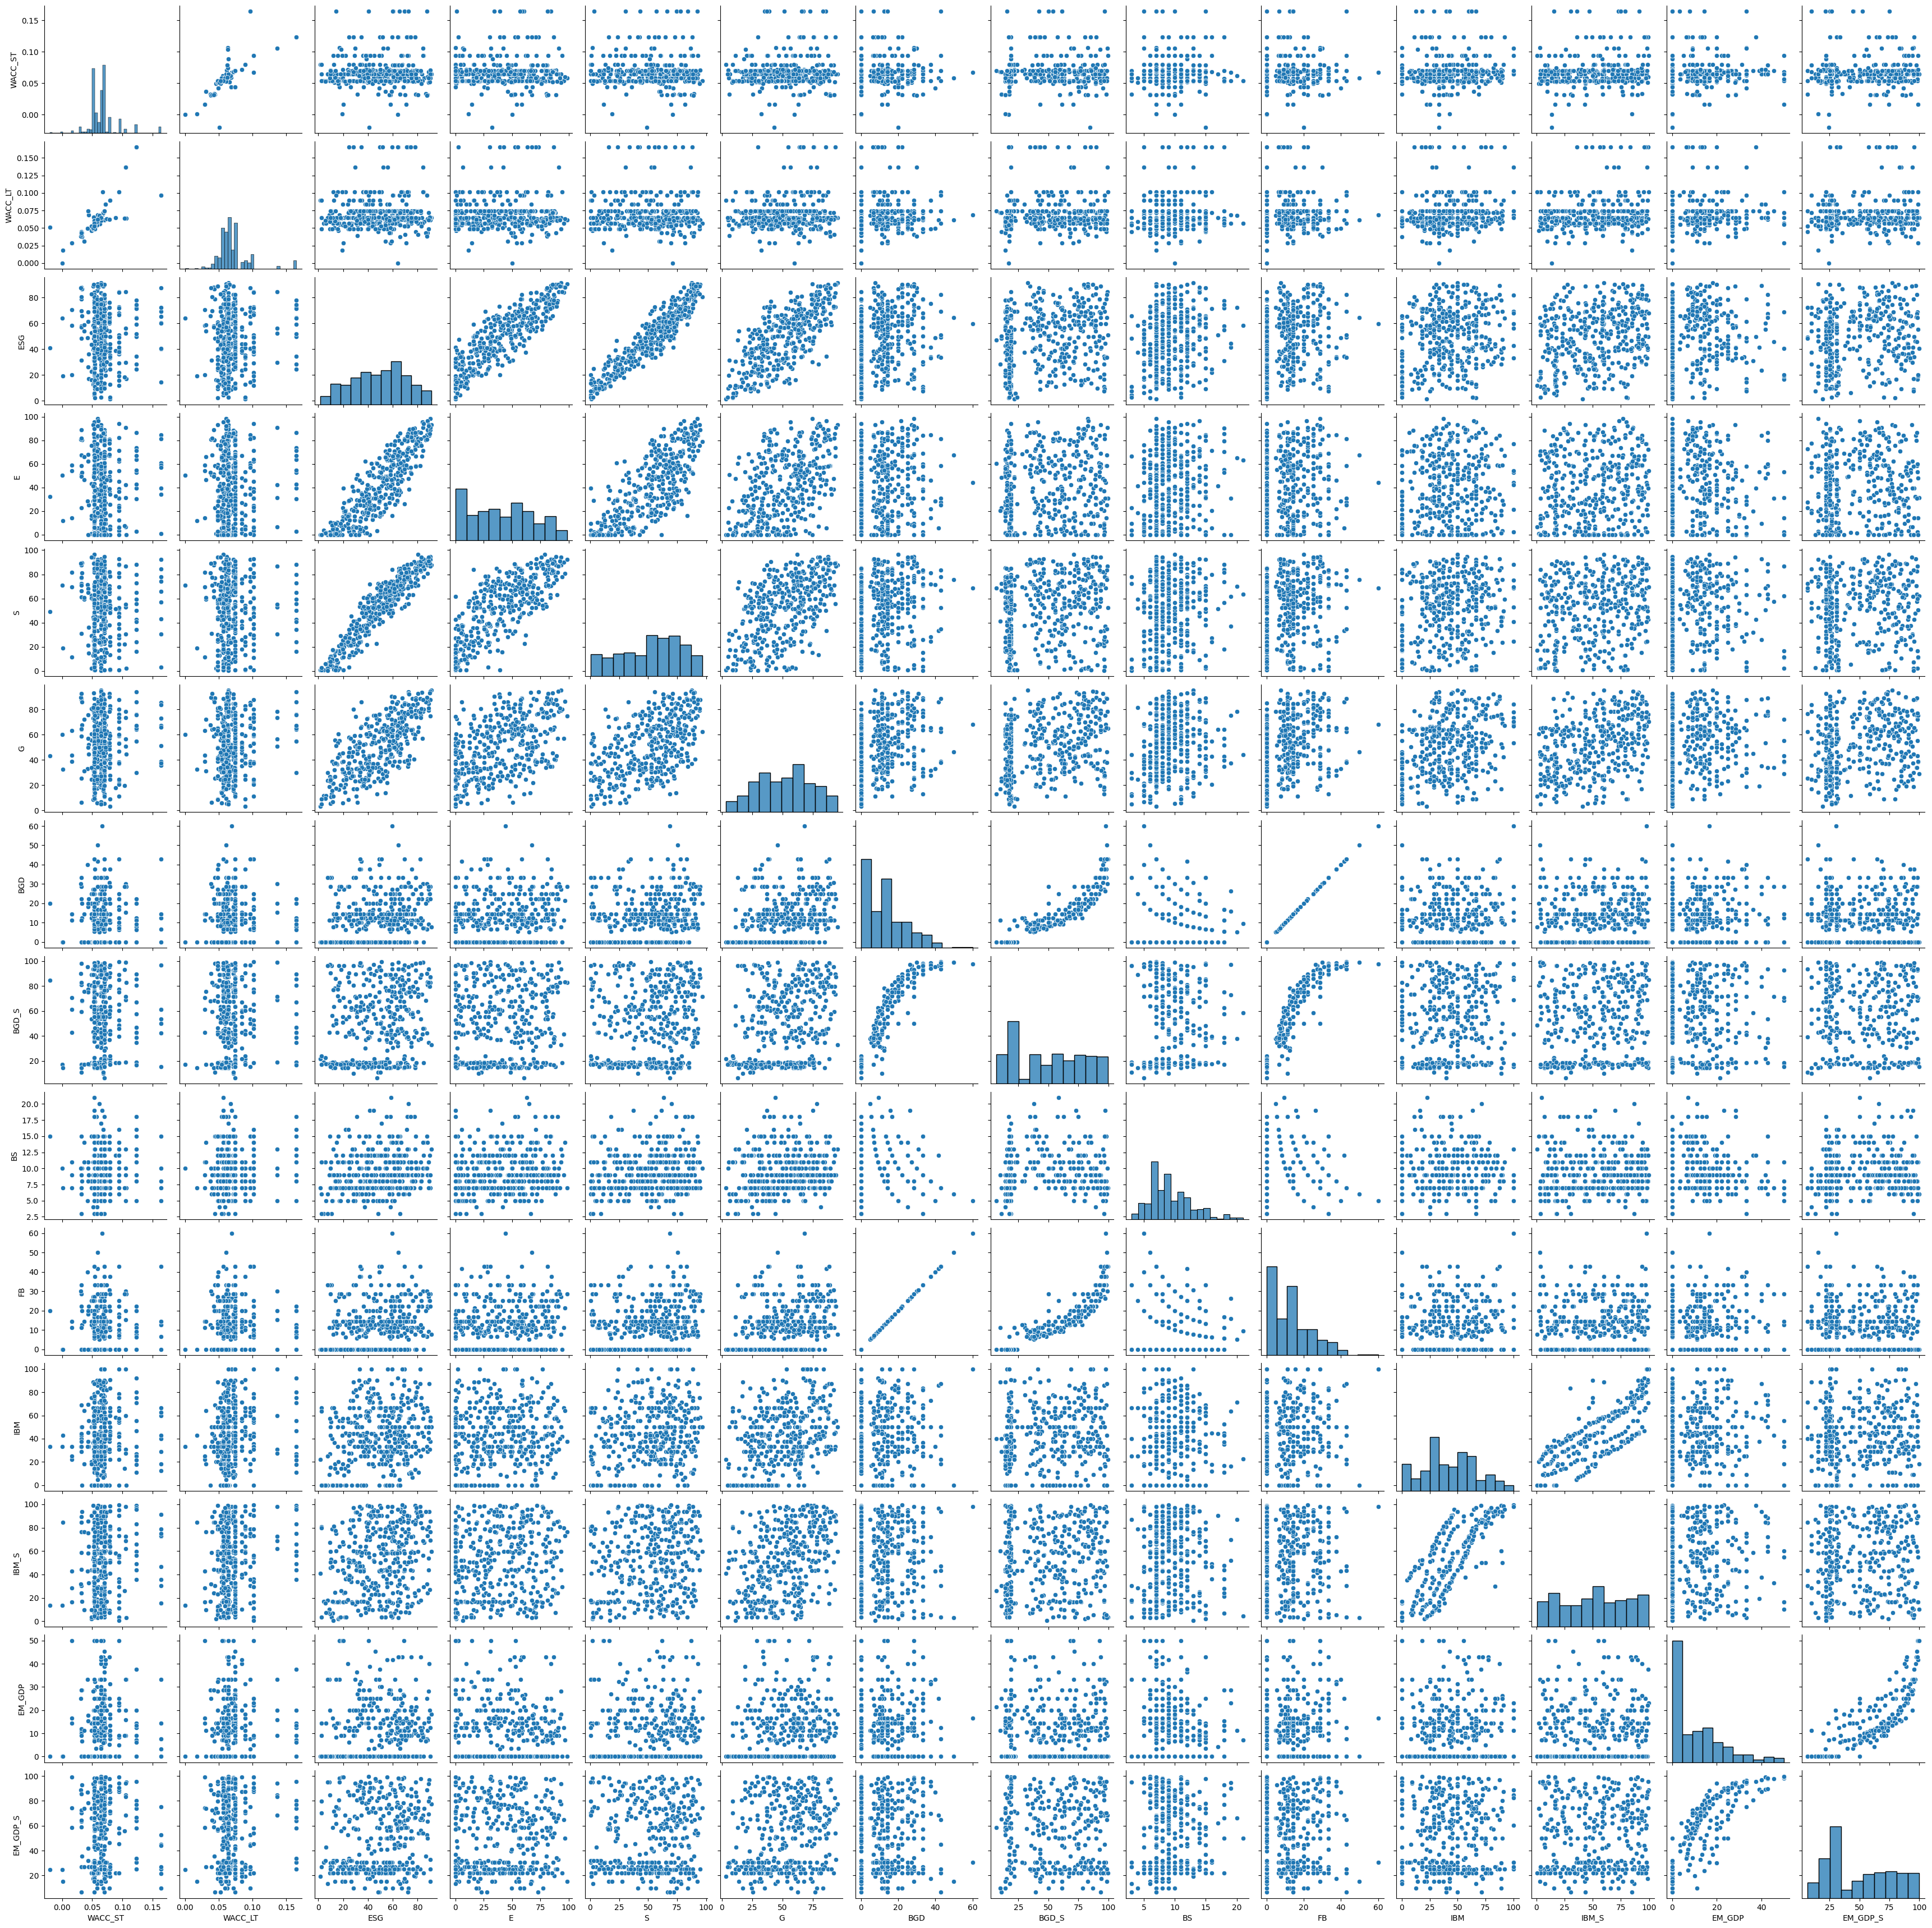

In [ ]:
#Se crea el DashBoard Conjunto
sns.pairplot(XDB)
plt.show()

In [ ]:
#Se procede con la correlación entre las variables
dfcorrel=pd.DataFrame(np.column_stack((XD[:,0],XD[:,1],XD[:,2],XD[:,3],XD[:,4],XD[:,5],XD[:,6],XD[:,7],XD[:,8],XD[:,9],XD[:,10],XD[:,11],yd)))
dfcorrel.columns=['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S','WACC_ST','WACC_LT']
dfcorrel.corr()
dfcorrel.to_excel('InformeCorrel.xlsx')

#Número de Empresas que cumplen con la condición
numero_compañias=len(XDB)
print('El número de empresas que cumplen con la condición es:',numero_compañias)

,ESG,E,S,G,BGD,BGD_S,BS,FB,IBM,IBM_S,EM_GDP,EM_GDP_S,WACC_ST,WACC_LT
ESG,1.000000,0.875494,0.936106,0.728241,0.240896,0.218795,0.188361,0.240896,0.227917,0.255855,0.079450,0.111878,0.037075,0.036034
E,0.875494,1.000000,0.780790,0.480386,0.161951,0.143824,0.134730,0.161951,0.086438,0.117472,-0.019990,0.020321,0.031299,0.012669
S,0.936106,0.780790,1.000000,0.537514,0.194166,0.150934,0.158144,0.194166,0.190394,0.190754,0.060745,0.063505,0.002531,-0.002511
G,0.728241,0.480386,0.537514,1.000000,0.316220,0.331379,0.165445,0.316220,0.332670,0.415760,0.188570,0.236967,0.094230,0.111106
BGD,0.240896,0.161951,0.194166,0.316220,1.000000,0.925552,-0.041535,1.000000,0.168081,0.154688,0.149692,0.114046,0.050181,0.021126
BGD_S,0.218795,0.143824,0.150934,0.331379,0.925552,1.000000,0.070794,0.925552,0.111544,0.156882,0.095421,0.132289,0.052396,0.041452
BS,0.188361,0.134730,0.158144,0.165445,-0.041535,0.070794,1.000000,-0.041535,0.074014,0.019581,-0.037032,0.079624,-0.002173,0.067679
FB,0.240896,0.161951,0.194166,0.316220,1.000000,0.925552,-0.041535,1.000000,0.168081,0.154688,0.149692,0.114046,0.050181,0.021126
IBM,0.227917,0.086438,0.190394,0.332670,0.168081,0.111544,0.074014,0.168081,1.000000,0.808959,0.108967,0.062580,0.106101,0.147186
IBM_S,0.255855,0.117472,0.190754,0.415760,0.154688,0.156882,0.019581,0.154688,0.808959,1.000000,0.046743,0.064643,0.130662,0.177494


**Modelo ADALINE** Este modelo busca el pronóstico del Score para un grupo de solicitantes de crédito

2. Procedemos a implementar nuestro primer modelo neuronal-ADALINE (Adaptive Linear)

*a. Short-Term*

In [ ]:
NE=12 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='sigmoid', use_bias=False, input_dim=NE))  #Se utiliza la función logística "sigmoid"
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydps, epochs=1000, batch_size=40) #batch size se recomienda un 10% de los datos
yst=model.predict(XDn)


Epoch 1/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 13/1000
10/10 [====

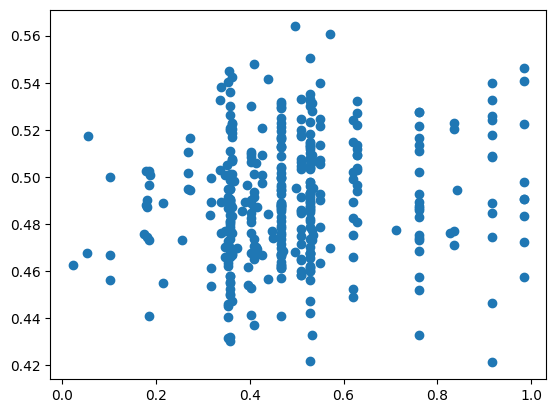

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydps,yst)
plt.show()

In [ ]:
#Matriz de Correlación
dfst=pd.DataFrame(np.column_stack((ydps,yst)))
print("La correlación es:",dfst.corr())

dfst.to_excel('InformeCorrelación_ShortTerm.xlsx')

La correlación es:           0         1
0  1.000000  0.143398
1  0.143398  1.000000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()
print("Los efectos independintes son:\n",W)

Los efectos independintes son:
 [array([[ 0.13797428],
       [ 0.07089552],
       [-0.40000844],
       [ 0.14434849],
       [-0.12322272],
       [-0.06060711],
       [-0.19082236],
       [ 0.26188722],
       [ 0.21130258],
       [ 0.07698813],
       [ 0.12589996],
       [-0.15184897]], dtype=float32)]


<Figure size 640x480 with 0 Axes>

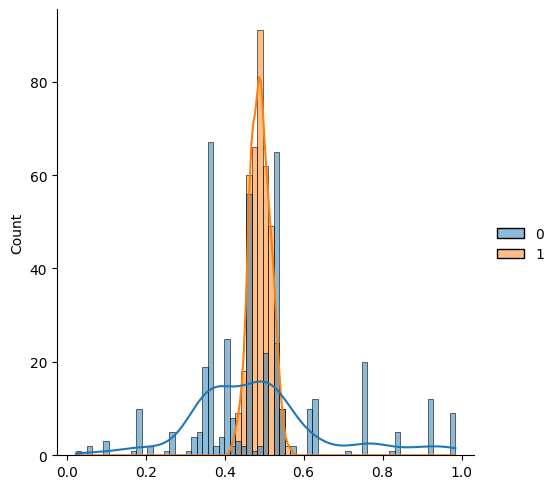

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydps.flatten(),yst.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm=(np.mean(ydps)-np.mean(yst))/np.mean(ydps)
print("La discrepancia entre medias es:",dscm*100)

La discrepancia entre medias es: -0.802129953815414


In [ ]:
#Discrepancia entre desviaciones
dscv=(np.std(ydps)-np.std(yst))/np.std(ydps)
print("La discrepancia entre dispersiones:",dscv*100)

La discrepancia entre dispersiones: 85.25528703662762


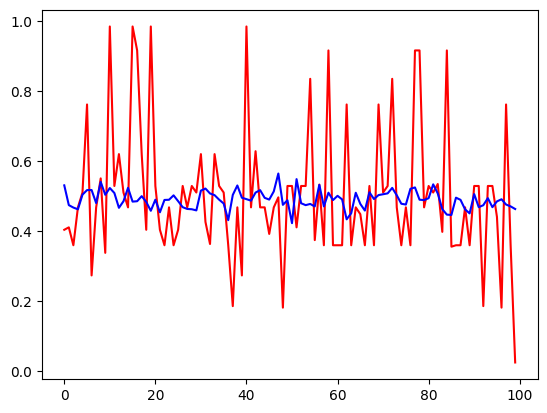

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydps[0:100,],'r',yst[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

*b. Long-Term*

In [ ]:
NE=12 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='sigmoid', use_bias=False, input_dim=NE))  #Se utiliza la función logística "sigmoid"
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydpl, epochs=1000, batch_size=40) #batch size se recomienda un 10% de los datos
ylt=model.predict(XDn)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0892
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0851
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0810
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 11/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0594
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 13/1000
10/10 [====

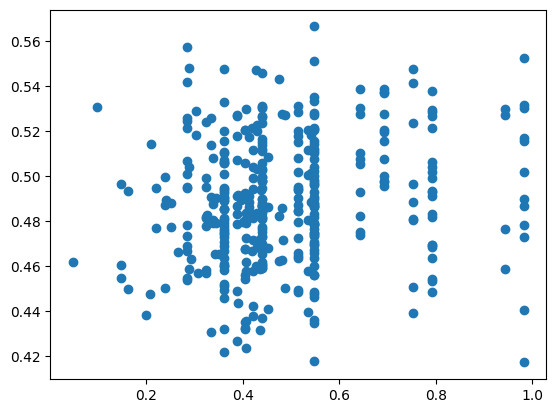

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydpl,ylt)
plt.show()

In [ ]:
#Matriz de Correlación
dflt=pd.DataFrame(np.column_stack((ydpl,ylt)))
print("La correlación es:",dflt.corr())

dflt.to_excel('InformeCorrelación_LongTerm.xlsx')

La correlación es:         0       1
0  1.0000  0.1521
1  0.1521  1.0000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()
print("Los efectos independintes son:\n",W)

Los efectos independintes son:
 [array([[-0.08424503],
       [ 0.03837278],
       [-0.19877301],
       [ 0.08822388],
       [-0.2659021 ],
       [ 0.07871921],
       [-0.22706018],
       [ 0.07365704],
       [ 0.25713578],
       [ 0.14040905],
       [ 0.11557355],
       [-0.13016604]], dtype=float32)]


<Figure size 640x480 with 0 Axes>

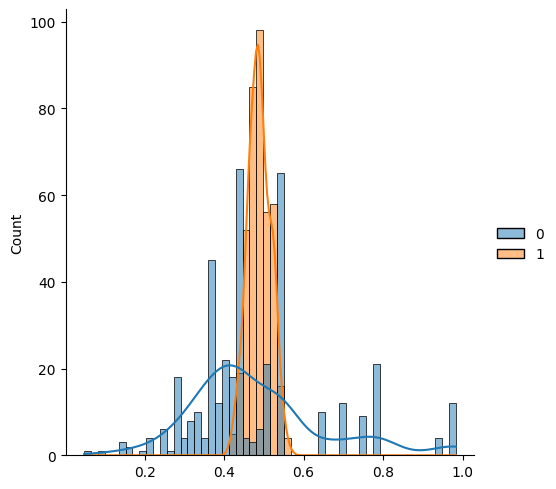

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydpl.flatten(),ylt.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm=(np.mean(ydpl)-np.mean(ylt))/np.mean(ydpl)
print("La discrepancia entre medias es:",dscm*100)

La discrepancia entre medias es: -1.108478088336776


In [ ]:
#Discrepancia entre desviaciones
dscv=(np.std(ydpl)-np.std(ylt))/np.std(ydpl)
print("La discrepancia entre dispersiones:",dscv*100)

La discrepancia entre dispersiones: 83.66407866480836


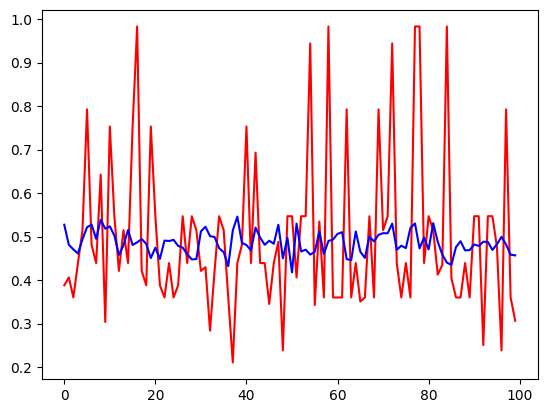

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydpl[0:100,],'r',ylt[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

3. **Modelo MADALINE** (Multi-Adaptive Linear)

a. Short-Term

In [ ]:
NE=12 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(20, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydps, epochs=1000, batch_size=40)
yst2=model.predict(XDn)

Epoch 1/1000
10/10 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 13/1000
10/10 [====

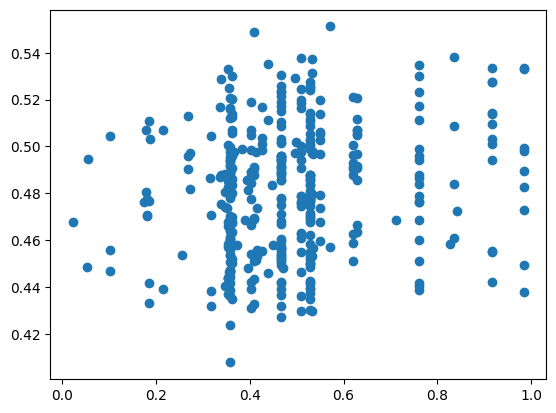

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydps,yst2)
plt.show()

In [ ]:
#Matriz de Correlación
dfst2=pd.DataFrame(np.column_stack((ydps,yst2)))
dfst2.corr()
print("La correlación es:",dfst2.corr())

dfst2.to_excel('InformeCorrelación_ShortTerm2.xlsx')

La correlación es:           0         1
0  1.000000  0.166302
1  0.166302  1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

print("Los efectos independientes son:\n",np.dot(W2,C2))

Los efectos independientes son:
 [[-0.02321813]
 [ 0.13700065]
 [-0.29608724]
 [ 0.18936367]
 [ 0.21808058]
 [ 0.12285461]
 [ 0.03135493]
 [-0.3044212 ]
 [ 0.20394234]
 [ 0.1369007 ]
 [ 0.16997984]
 [-0.13329282]]


<Figure size 640x480 with 0 Axes>

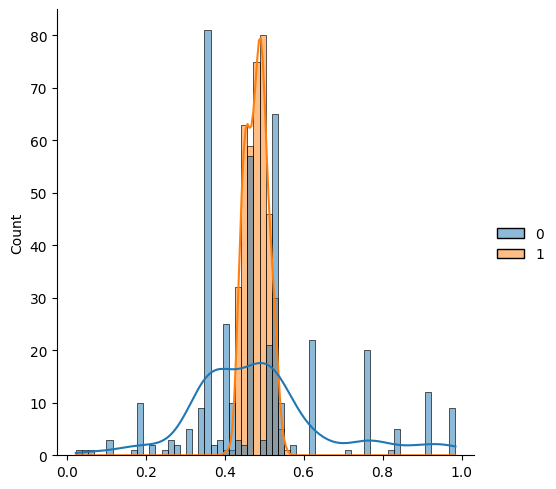

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydps.flatten(),yst2.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm2=(np.mean(ydps)-np.mean(yst2))/np.mean(ydps)
print("La discrepancia entre medias es:",dscm2*100)

#Discrepancia entre desviaciones
dscv2=(np.std(ydps)-np.std(yst2))/np.std(ydps)
print("La discrepancia entre dispersiones:",dscv2*100)

La discrepancia entre medias es: 1.0871748639924608
La discrepancia entre dispersiones: 84.12039940763425


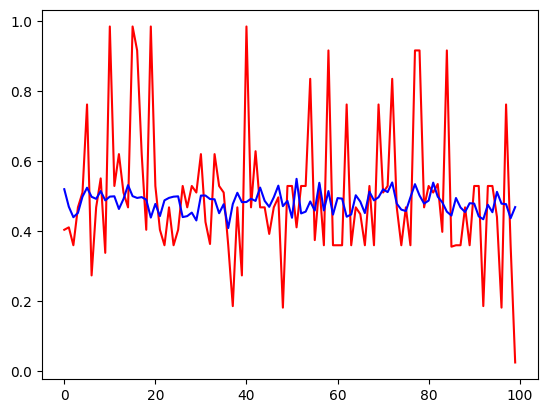

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydps[0:100,],'r',yst2[0:100,],'b')
plt.show()

In [ ]:
XDB2=pd.read_excel('/content/0. BGD and Cost of Debt 2.xlsx',sheet_name=1)
XDB2=XDB2[['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']]
XDB2=XDB2.dropna()

#Se cargan los datos en bruto
XD2=np.array(XDB2[['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']])

#Se normalizan los datos
XDn2=XD2/np.max(XD2,axis=0)

#Se predicen los datos
yp=model.predict(XDn2)

#Las empresas que han experimentado un aumento en el costo de la deuda en el Corto Plazo
l2=(len(np.where(yp<np.mean(yp))[0]))/len(yp)
print("El procentaje en el short term de los individuos es:",l2)

2/2 [==============================] - 0s 6ms/step
El procentaje en el short term de los individuos es: 0.5079365079365079


b. Long-Term

In [ ]:
NE=12 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(10, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydpl, epochs=1000, batch_size=40)
ylt2=model.predict(XDn)

Epoch 1/1000
10/10 [==============================] - 1s 3ms/step - loss: 0.0419
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 12/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 13/1000
10/10 [====

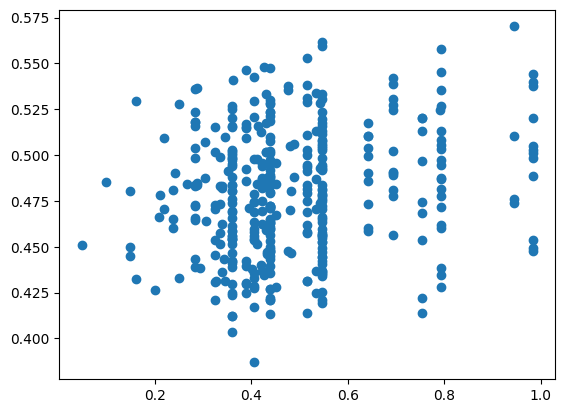

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydpl,ylt2)
plt.show()

In [ ]:
#Matriz de Correlación
dflt2=pd.DataFrame(np.column_stack((ydpl,ylt2)))
dflt2.corr()
print("La correlación es:",dflt2.corr())
dflt2.to_excel('InformeCorrelación_LongTerm2.xlsx')

La correlación es:           0         1
0  1.000000  0.200897
1  0.200897  1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

print("Los efectos independientes son:\n",np.dot(W2,C2))

Los efectos independientes son:
 [[ 0.24260846]
 [-0.04491642]
 [-0.31921035]
 [ 0.06341882]
 [ 0.01578929]
 [ 0.12859052]
 [ 0.09159927]
 [-0.21405351]
 [ 0.4006709 ]
 [ 0.10421683]
 [-0.09170439]
 [ 0.13033615]]


<Figure size 640x480 with 0 Axes>

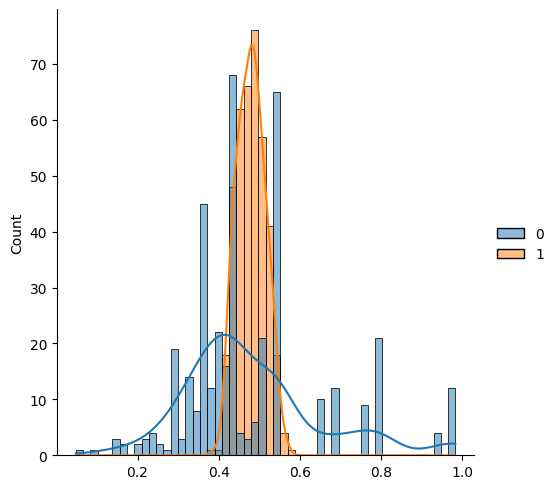

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydpl.flatten(),ylt2.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm2=(np.mean(ydpl)-np.mean(ylt2))/np.mean(ydpl)
print("La discrepancia entre medias es:",dscm2*100)

#Discrepancia entre desviaciones
dscv2=(np.std(ydpl)-np.std(ylt2))/np.std(ydpl)
print("La discrepancia entre dispersiones:",dscv2*100)

La discrepancia entre medias es: 0.7652174002642084
La discrepancia entre dispersiones: 80.30601399144712


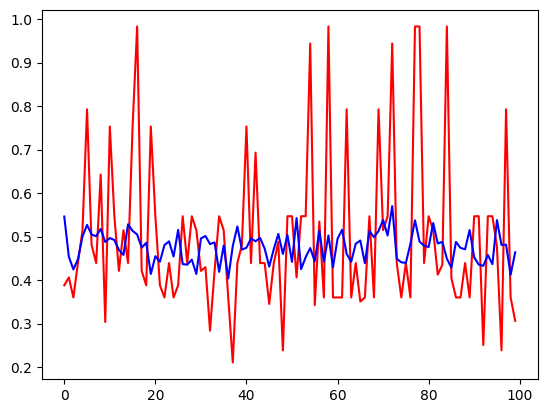

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydpl[0:100,],'r',ylt2[0:100,],'b')
plt.show()

In [ ]:
XDB2=pd.read_excel('/content/0. BGD and Cost of Debt 2.xlsx',sheet_name=1)
XDB2=XDB2[['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']]
XDB2=XDB2.dropna()

#Se cargan los datos en bruto
XD2=np.array(XDB2[['ESG','E', 'S','G','BGD','BGD_S','BS','FB','IBM','IBM_S','EM_GDP','EM_GDP_S']])

#Se normalizan los datos
XDn2=XD2/np.max(XD2,axis=0)

#Se predicen los datos
yp1=model.predict(XDn2)

#Las empresas que han experimentado un aumento en el costo de la deuda en el Largo Plazo
l2=(len(np.where(yp1<np.mean(yp1))[0]))/len(yp1)
print("El procentaje en el long term de los individuos es:",l2)

2/2 [==============================] - 0s 6ms/step
El procentaje en el long term de los individuos es: 0.5079365079365079


5. **Objetivos:**

**a. Determinar las variables independientes que tienen mayor correalación sobre las variables dependientes que caracterizan el costo de la deuda**

**R/.** Las variables independientes que tienen mayor correlación sobre las variables dependientes que caracterizan el costo de la deuda es **IBM_S en ambos casos con 0.130662	0.177494 respectivamente.

**b. Numero de empresas que cumplen con esta condición**

**R/.** Listo

**Crear un Modelo Neuronal  utilizando la libreria Tensorflow para identificar el efecto independiente de cada una de las variables independientes frente a las variables de salida**

**c. Coeficiente de correlación frente a la variable Short Term. Para tal efecto se sugiere la configuración del modelo a un total de 20 regresiones lineales, función de activación logística, 1000 épocas, y un batch del 10% del total de datos**

**R/.** Promedio de las 5 ejecuciones en excel "Parcial 2"

**d. Coeficiente de correlación frente a la variable Long Term. Para tal efecto se sugiere la configuración del modelo a un total de 10 regresiones lineales, función de activación logística, 1000 épocas, y un batch del 10% del total de datos**

**R/.** Promedio de las 5 ejecuciones en excel "Parcial 2"

**e. Dterminar los coeficientes independientes promedio y su impacto sobre el costo de la deuda, así como las discrepancias de la media y la varianza promedio para ambos modelos, para un total de 5 ejecuciones**

**R/.** Promedio de las 5 ejecuciones en excel "Parcial 2"

**f. Estimar los porcentajes para el costo de la deuda (Short-term y Long-term) para las empresas que hacen parte de la hoja de pronóstico, y determinar el porcentaje de dichas empresas que han experimentado una disminución en el costo de la deuda. Aqui, un menor costo de la deuda está determinado por valores de probabilidad bajos**

**R/.** Listo

**6. Análisis de Resultados**

Durante la elaboración de los modelos se puede observar que para las variables dependientes Short Term y Long Term, la variable dependiente que tuvo mayor correlación para ambas fue IBM_S con 0.130662 0.177494 respectivamente. Y la que menor comportamiento tuvo para Short-Term fue EM_GDP_S con -0,000029 y para Long-Term fue S con -0,00251.Asimismo, se dio a conocer que 393 son las empresas que cumplen con tener todos los datos.

En consecuencia, se realizaron los modelos neuronales ADALINE y MADALINE. Después de correr el modelo 5 veces, y anotarlo en el excel ("Parcial 2"), es evidente que el modelo que tuvo mejor comportamiento es el MADALINE, pues solo en temas de correlación tuvo para Short-Time un promedio de 0,1666 y para Long-Term 0,2024; mientras que en ADALINE arrojó 0,1424 y 0,1529 respectivamente. Del mismo modo, para la discrepancia entre medias, en el corto plazo 0,1624, y en el largo plazo 0,6675. Para la discrepancias de varianzas, en el primer caso, da 83,4727 y para el segundo 80,1557. Por último, se hizo lo mismo para cada variable independiente (Short-Term y Long-Term):
ESG: -0,1369 y -0,2184; E: 0,1707 y 0,0811; S: -0,2354 y -0,2030; G:0,2270 y 0,2040; BGD: -0,2549 y -0,0551; BGD_S: 0,1241 y 0,1464; BS: 0,0370 y 0,0938; FB: 0,0617 y -0,2503; IBM: 0,2132 y 0,4132; IBM_S: 0,1444 y 0,0960; EM_GDP: 0,1654 y -0,0956; y EM_GDP_S: -0,1327 y 0,1358.

Finalmente, se estimaron los procentajes para el costo de la deuda de la hoja del prónostico, y el programa arrojó que el procentaje en el short term de los individuos es: 0.5079365079365079, y en el procentaje en el long term de los individuos es: 0.5079365079365079
